### Stage 1: 
#### In the data pre-processing, we perform exploratory data analysis, fix discrete/continiuous variables, create dummy variables for discrete ones, clean the variables with null values

# Importing the loan data into python

In [1]:
import numpy as np
import pandas as pd

In [2]:
pwd

'/Users/ankitbharali/Desktop/Desktop - Ankit’s MacBook Pro/Study-2020/CreditRisk Modeling/Practice_1/2_Data_Preparation'

In [3]:
loan_data_copy = pd.read_csv('../loan_data_2007_2014.csv')

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
loan_data_1 = loan_data_copy.copy()

# Explore Data

In [5]:
#Display all columns
pd.options.display.max_columns = None

In [94]:
loan_data_1.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [7]:
loan_data_1.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
loan_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 



# General PreProcessing


## 1. Preprocessing few continious varaiables - 
### emp_length, earliest_cr_line, term, issue_d

In [9]:
# Transform values in few continious variable that contains text

In [10]:
loan_data_1['emp_length'].unique()
# Displays unique values of a column.

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [11]:
loan_data_1['emp_length_int'] = loan_data_1['emp_length'].str.replace('\+ years', '')
loan_data_1['emp_length_int'] = loan_data_1['emp_length_int'].str.replace('< 1 year', str(0))
loan_data_1['emp_length_int'] = loan_data_1['emp_length_int'].str.replace('n/a',  str(0))
loan_data_1['emp_length_int'] = loan_data_1['emp_length_int'].str.replace(' years', '')
loan_data_1['emp_length_int'] = loan_data_1['emp_length_int'].str.replace(' year', '')

In [12]:
# Checks the datatype of a single element of a column.
type(loan_data_1['emp_length_int'][0])

str

In [13]:
# Transforms the values to numeric.
loan_data_1['emp_length_int'] = pd.to_numeric(loan_data_1['emp_length_int'])

In [14]:
loan_data_1['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [15]:
# Convert the date and the time from a string into a datetime format.
loan_data_1['earliest_cr_line_date'] = pd.to_datetime(loan_data_1['earliest_cr_line'], format = '%b-%y')

In [16]:
loan_data_1['earliest_cr_line_date'] 

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line_date, Length: 466285, dtype: datetime64[ns]

In [17]:
# Calculates the difference between today's datetime and provided datetimes.
# Assume we are now in January 2020
pd.to_datetime('2020-01-01') - loan_data_1['earliest_cr_line_date']

0        12783 days
1         7580 days
2         6635 days
3         8735 days
4         8766 days
            ...    
466280    6119 days
466281    8249 days
466282    6605 days
466283    6178 days
466284    7274 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [18]:
loan_data_1['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2020-01-01') - loan_data_1['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [19]:
# Shows some descriptive statisics for the values of a column.
loan_data_1['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        264.482430
std          93.974829
min        -587.000000
25%         208.000000
50%         250.000000
75%         310.000000
max         612.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [20]:
loan_data_1['mths_since_earliest_cr_line'][loan_data_1['mths_since_earliest_cr_line']<0]

1580     -512.0
1770     -584.0
2799     -536.0
3282     -572.0
3359     -541.0
          ...  
464003   -576.0
464260   -558.0
465100   -573.0
465500   -572.0
465655   -432.0
Name: mths_since_earliest_cr_line, Length: 1169, dtype: float64

In [21]:
loan_data_1.loc[:,['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][loan_data_1['mths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-512.0
1770,Sep-68,2068-09-01,-584.0
2799,Sep-64,2064-09-01,-536.0
3282,Sep-67,2067-09-01,-572.0
3359,Feb-65,2065-02-01,-541.0
...,...,...,...
464003,Jan-68,2068-01-01,-576.0
464260,Jul-66,2066-07-01,-558.0
465100,Oct-67,2067-10-01,-573.0
465500,Sep-67,2067-09-01,-572.0


In [22]:
loan_data_1['mths_since_earliest_cr_line'][loan_data_1['mths_since_earliest_cr_line'] < 0] = loan_data_1['mths_since_earliest_cr_line'].max()

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
min(loan_data_1['mths_since_earliest_cr_line'])

98.0

In [24]:
loan_data_1['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [25]:
loan_data_1['term'].describe()

count         466285
unique             2
top        36 months
freq          337953
Name: term, dtype: object

In [26]:
loan_data_1['term_int'] = pd.to_numeric(loan_data_1['term'].str.replace(' months', ''))

In [27]:
loan_data_1['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [28]:
loan_data_1['issue_d_date'] = pd.to_datetime(loan_data_1['issue_d'], format = '%b-%y')

In [29]:
loan_data_1['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2020-01-01') - loan_data_1['issue_d_date']) / np.timedelta64(1, 'M')))

## 2. Preprocessing few discrete varaiables: 
### grade, sub_grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status

In [30]:
# Create dummy variables from a variable.
pd.get_dummies(loan_data_1['grade'], prefix = 'grade', prefix_sep = ':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [31]:
loan_data_dummies = [pd.get_dummies(loan_data_1['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data_1['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data_1['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data_1['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data_1['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data_1['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data_1['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data_1['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [32]:
type(loan_data_dummies)

list

In [33]:
# Concatenate the dummy variables and turns them into a dataframe.
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [34]:
loan_data_dummies

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [35]:
loan_data_1 = pd.concat([loan_data_1, loan_data_dummies], axis = 1)

In [36]:
loan_data_1.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

# Check for missing values

In [37]:
pd.options.display.max_rows = 100
loan_data_1.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 207, dtype: int64

In [38]:
loan_data_1['total_rev_hi_lim']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
466280    29900.0
466281    39400.0
466282    13100.0
466283    53100.0
466284    16000.0
Name: total_rev_hi_lim, Length: 466285, dtype: float64

In [39]:
# 'Total revolving high credit/ credit limit', so it makes sense that the missing values are equal to funded_amnt.
loan_data_1['total_rev_hi_lim'].fillna(loan_data_1['funded_amnt'], inplace=True)

In [40]:
loan_data_1['annual_inc'].fillna(loan_data_1['annual_inc'].mean(), inplace=True)

In [41]:
# fill the missing values with zeroes.
loan_data_1['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data_1['acc_now_delinq'].fillna(0, inplace=True)
loan_data_1['total_acc'].fillna(0, inplace=True)
loan_data_1['pub_rec'].fillna(0, inplace=True)
loan_data_1['open_acc'].fillna(0, inplace=True)
loan_data_1['inq_last_6mths'].fillna(0, inplace=True)
loan_data_1['delinq_2yrs'].fillna(0, inplace=True)
loan_data_1['emp_length_int'].fillna(0, inplace=True)

# PD Model

## Data Preparation
### Dependent Variable - Define dafault (Good/Bad)
#### Bad loans - 'Charged Off', 'Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)'

In [42]:
loan_data_1['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [43]:
loan_data_1['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [44]:
# Good/ Bad Definition
loan_data_1['good_bad'] = np.where(loan_data_1['loan_status'].isin
                                   (['Charged Off',
                                     'Default',
                                     'Does not meet the credit policy. Status:Charged Off',
                                     'Late (31-120 days)']), 0, 1)

In [45]:
loan_data_1['good_bad'] 

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int64

## Splitting the data - Train (80%) & Test data (20%)

In [46]:
from sklearn.model_selection import train_test_split
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data_1.drop('good_bad', axis = 1), loan_data_1['good_bad'], test_size = 0.2, random_state = 102)

## Data Preparation - Train dataset

In [47]:
#train_inputs_prepr = loan_data_inputs_train
#train_targets_prepr = loan_data_targets_train

train_inputs_prepr = loan_data_inputs_test
train_targets_prepr = loan_data_targets_test



### 	- "Weight of evidence" - The ability of each category to predict the dependent variable. 
		○ To what extent an independent variable would predict a dependent variable
		○ ln(%Good/%Bad)
###     - "Information value" - shows how much information the original independent variable brings with to explaining the dependent variable



## Function to calculate WoE

In [48]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

## Visualizing WoE

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
# Imports the libraries we need.
sns.set()

In [50]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

In [51]:
# 'grade'
df_temp = woe_discrete(train_inputs_prepr, 'grade', train_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2707,0.724788,0.007257,1962.0,745.0,0.005904,0.018309,-1.131835,NaN,NaN,0.286883
1,F,10594,0.759015,0.028400,8041.0,2553.0,0.024195,0.062743,-0.952886,0.034227,0.178949,0.286883
2,E,28510,0.806594,0.076429,22996.0,5514.0,0.069195,0.135512,-0.672140,0.047580,0.280746,0.286883
3,D,61494,0.845741,0.164851,52008.0,9486.0,0.156491,0.233129,-0.398590,0.039147,0.273551,0.286883
4,C,100102,0.885846,0.268350,88675.0,11427.0,0.266822,0.280831,-0.051171,0.040105,0.347418,0.286883
5,B,109646,0.921465,0.293935,101035.0,8611.0,0.304013,0.211624,0.362256,0.035619,0.413428,0.286883
6,A,59975,0.960750,0.160779,57621.0,2354.0,0.173381,0.057852,1.097601,0.039285,0.735345,0.286883


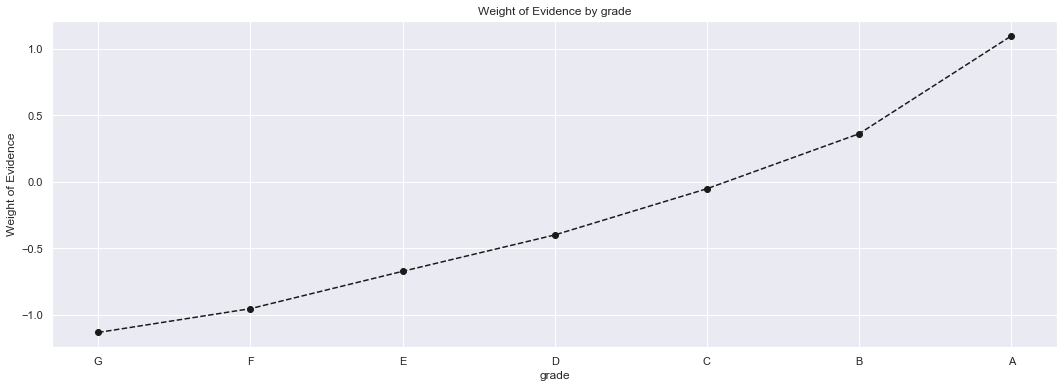

In [52]:
plot_by_woe(df_temp)

In [53]:
# 'home_ownership'
df_temp = woe_discrete(train_inputs_prepr, 'home_ownership', train_targets_prepr)
# We calculate weight of evidence.
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,150,0.793333,0.000402,119.0,31.0,0.000358,0.000762,-0.755034,NaN,NaN,inf
1,NONE,43,0.813953,0.000115,35.0,8.0,0.000105,0.000197,-0.624264,0.020620,0.130770,inf
2,RENT,150670,0.874308,0.403911,131732.0,18938.0,0.396380,0.465421,-0.160571,0.060355,0.463693,inf
3,OWN,33326,0.891466,0.089339,29709.0,3617.0,0.089394,0.088892,0.005635,0.017158,0.166206,inf
4,MORTGAGE,188838,0.904172,0.506230,170742.0,18096.0,0.513760,0.444728,0.144293,0.012706,0.138658,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.095828,inf,inf


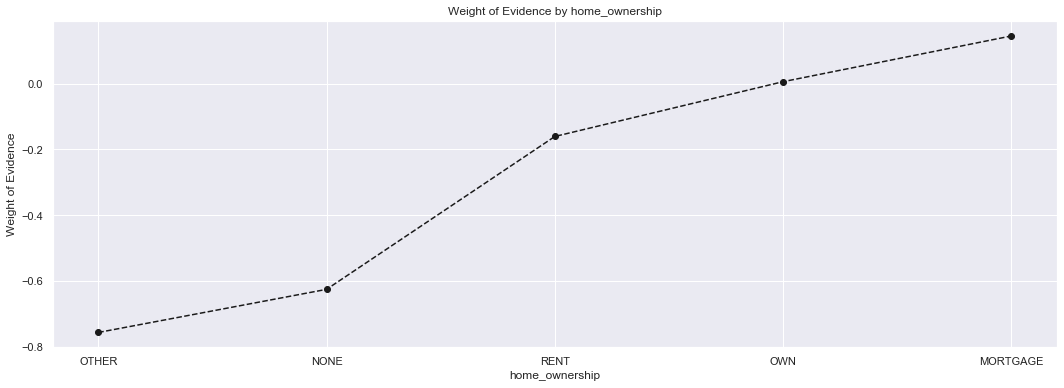

In [54]:
plot_by_woe(df_temp)

In [55]:
train_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([train_inputs_prepr['home_ownership:RENT'], 
                                                             train_inputs_prepr['home_ownership:OTHER'],
                                                             train_inputs_prepr['home_ownership:NONE'],
                                                             train_inputs_prepr['home_ownership:ANY']])

In [56]:
df_temp = woe_discrete(train_inputs_prepr, 'addr_state', train_targets_prepr)
# We calculate weight of evidence.
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,12,0.500000,0.000032,6.0,6.0,0.000018,0.000147,-2.100170,NaN,NaN,inf
1,IA,12,0.750000,0.000032,9.0,3.0,0.000027,0.000074,-1.001558,0.250000,1.098612,inf
2,NV,5253,0.859890,0.014082,4517.0,736.0,0.013592,0.018088,-0.285797,0.109890,0.715761,inf
3,HI,1987,0.873176,0.005327,1735.0,252.0,0.005221,0.006193,-0.170837,0.013286,0.114960,inf
4,FL,25262,0.875267,0.067721,22111.0,3151.0,0.066532,0.077439,-0.151815,0.002092,0.019022,inf
5,AL,4636,0.877696,0.012428,4069.0,567.0,0.012244,0.013935,-0.129377,0.002429,0.022438,inf
6,NY,32121,0.884001,0.086109,28395.0,3726.0,0.085440,0.091570,-0.069292,0.006305,0.060085,inf
7,MO,6042,0.884310,0.016197,5343.0,699.0,0.016077,0.017179,-0.066278,0.000309,0.003014,inf
8,NJ,14567,0.884328,0.039051,12882.0,1685.0,0.038762,0.041411,-0.066105,0.000018,0.000174,inf
9,VA,11345,0.884707,0.030413,10037.0,1308.0,0.030201,0.032145,-0.062391,0.000379,0.003714,inf


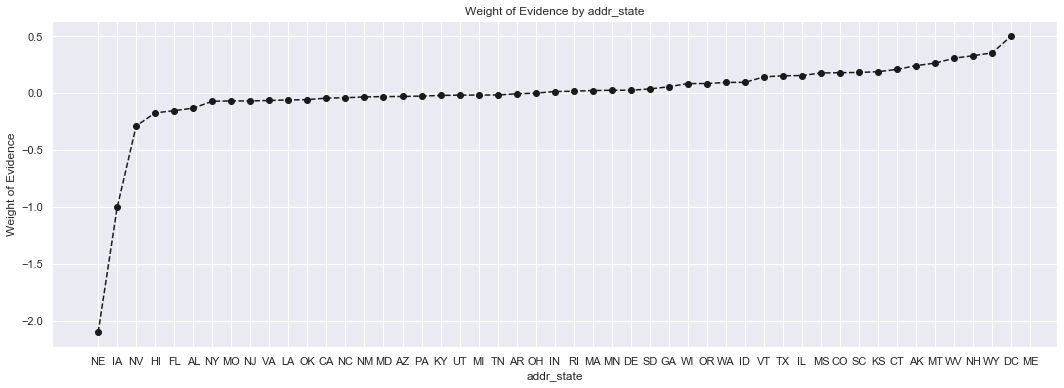

In [57]:
plot_by_woe(df_temp)

In [58]:
if ['addr_state:ND'] in train_inputs_prepr.columns.values:
    pass
else:
    train_inputs_prepr['addr_state:ND'] = 0

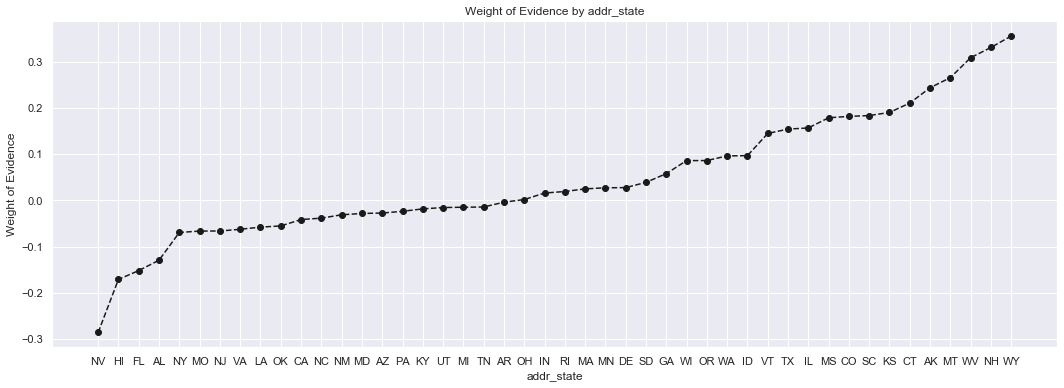

In [59]:
plot_by_woe(df_temp.iloc[2: -2, : ])

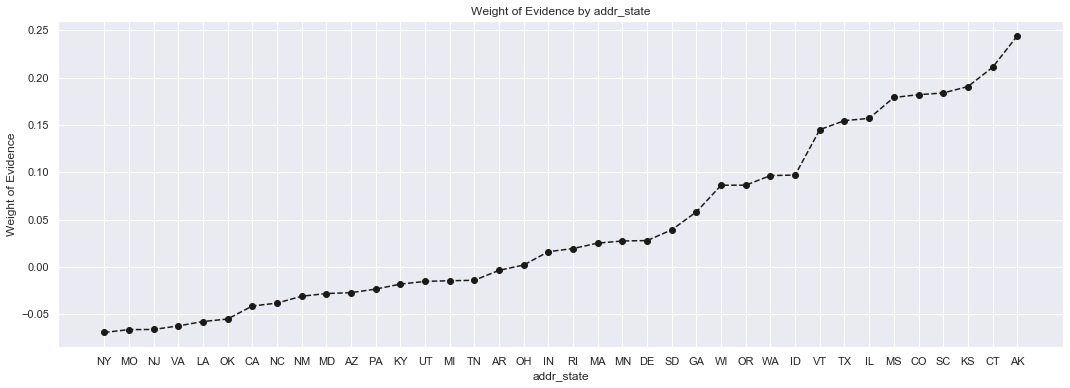

In [60]:
plot_by_woe(df_temp.iloc[6: -6, : ])

In [61]:
train_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([train_inputs_prepr['addr_state:ND'], 
                                                             train_inputs_prepr['addr_state:NE'],
                                                             train_inputs_prepr['addr_state:IA'], 
                                                             train_inputs_prepr['addr_state:NV'],
                                                             train_inputs_prepr['addr_state:FL'], 
                                                             train_inputs_prepr['addr_state:HI'],
                                                             train_inputs_prepr['addr_state:AL']])

train_inputs_prepr['addr_state:NM_VA'] = sum([train_inputs_prepr['addr_state:NM'], 
                                              train_inputs_prepr['addr_state:VA']])

train_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([train_inputs_prepr['addr_state:OK'], 
                                                          train_inputs_prepr['addr_state:TN'],
                                                          train_inputs_prepr['addr_state:MO'], 
                                                          train_inputs_prepr['addr_state:LA'],
                                                          train_inputs_prepr['addr_state:MD'], 
                                                          train_inputs_prepr['addr_state:NC']])

train_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([train_inputs_prepr['addr_state:UT'], 
                                                    train_inputs_prepr['addr_state:KY'],
                                                    train_inputs_prepr['addr_state:AZ'], 
                                                    train_inputs_prepr['addr_state:NJ']])

train_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([train_inputs_prepr['addr_state:AR'], 
                                                       train_inputs_prepr['addr_state:MI'],
                                                       train_inputs_prepr['addr_state:PA'], 
                                                       train_inputs_prepr['addr_state:OH'],
                                                       train_inputs_prepr['addr_state:MN']])

train_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([train_inputs_prepr['addr_state:RI'], 
                                                       train_inputs_prepr['addr_state:MA'],
                                                       train_inputs_prepr['addr_state:DE'], 
                                                       train_inputs_prepr['addr_state:SD'],
                                                       train_inputs_prepr['addr_state:IN']])

train_inputs_prepr['addr_state:GA_WA_OR'] = sum([train_inputs_prepr['addr_state:GA'], 
                                                 train_inputs_prepr['addr_state:WA'],
                                                 train_inputs_prepr['addr_state:OR']])

train_inputs_prepr['addr_state:WI_MT'] = sum([train_inputs_prepr['addr_state:WI'], 
                                              train_inputs_prepr['addr_state:MT']])

train_inputs_prepr['addr_state:IL_CT'] = sum([train_inputs_prepr['addr_state:IL'], 
                                              train_inputs_prepr['addr_state:CT']])

train_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([train_inputs_prepr['addr_state:KS'], 
                                                          train_inputs_prepr['addr_state:SC'],
                                                          train_inputs_prepr['addr_state:CO'], 
                                                          train_inputs_prepr['addr_state:VT'],
                                                          train_inputs_prepr['addr_state:AK'], 
                                                          train_inputs_prepr['addr_state:MS']])

train_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([train_inputs_prepr['addr_state:WV'], 
                                                          train_inputs_prepr['addr_state:NH'],
                                                          train_inputs_prepr['addr_state:WY'], 
                                                          train_inputs_prepr['addr_state:DC'],
                                                          train_inputs_prepr['addr_state:ME'], 
                                                          train_inputs_prepr['addr_state:ID']])

In [62]:
# 'verification_status'
df_temp = woe_discrete(train_inputs_prepr, 'verification_status', train_targets_prepr)
# We calculate weight of evidence.
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134481,0.872874,0.360512,117385.0,17096.0,0.353210,0.420152,-0.173556,NaN,NaN,0.020678
1,Source Verified,120013,0.896370,0.321727,107576.0,12437.0,0.323695,0.305652,0.057352,0.023495,0.230907,0.020678
2,Not Verified,118534,0.905875,0.317762,107377.0,11157.0,0.323096,0.274195,0.164109,0.009506,0.106757,0.020678


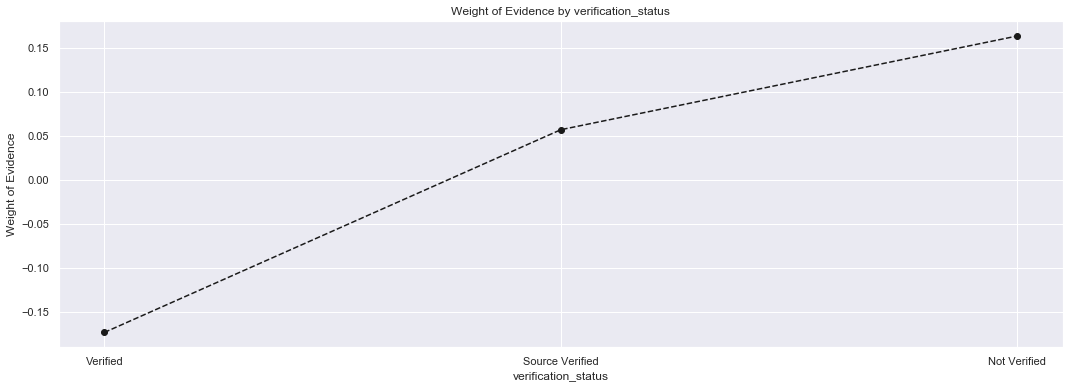

In [63]:
plot_by_woe(df_temp)

In [64]:
# 'purpose'
df_temp = woe_discrete(train_inputs_prepr, 'purpose', train_targets_prepr)
# We calculate weight of evidence.
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5625,0.784178,0.015079,4411.0,1214.0,0.013273,0.029835,-0.809989,NaN,NaN,0.037212
1,educational,325,0.787692,0.000871,256.0,69.0,0.000770,0.001696,-0.789099,0.003515,0.020890,0.037212
2,moving,2399,0.846603,0.006431,2031.0,368.0,0.006111,0.009044,-0.391970,0.058910,0.397130,0.037212
3,house,1822,0.857849,0.004884,1563.0,259.0,0.004703,0.006365,-0.302636,0.011246,0.089334,0.037212
4,other,18944,0.861170,0.050784,16314.0,2630.0,0.049089,0.064635,-0.275130,0.003321,0.027506,0.037212
5,renewable_energy,281,0.864769,0.000753,243.0,38.0,0.000731,0.000934,-0.244695,0.003599,0.030435,0.037212
6,medical,3661,0.866157,0.009814,3171.0,490.0,0.009541,0.012042,-0.232773,0.001388,0.011922,0.037212
7,wedding,1859,0.875740,0.004984,1628.0,231.0,0.004899,0.005677,-0.147480,0.009583,0.085293,0.037212
8,vacation,1996,0.881764,0.005351,1760.0,236.0,0.005296,0.005800,-0.090933,0.006024,0.056547,0.037212
9,debt_consolidation,219364,0.887128,0.588063,194604.0,24760.0,0.585560,0.608503,-0.038433,0.005365,0.052500,0.037212


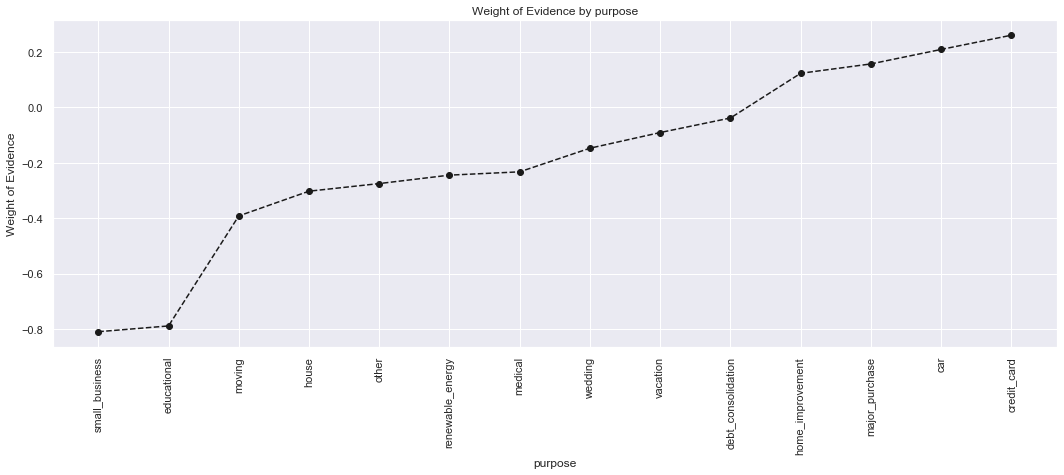

In [65]:
plot_by_woe(df_temp, 90)

In [67]:
train_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([train_inputs_prepr['purpose:educational'], 
                                                                       train_inputs_prepr['purpose:small_business'],
                                                                       train_inputs_prepr['purpose:wedding'], 
                                                                       train_inputs_prepr['purpose:renewable_energy'],
                                                                       train_inputs_prepr['purpose:moving'], 
                                                                       train_inputs_prepr['purpose:house']])

train_inputs_prepr['purpose:oth__med__vacation'] = sum([train_inputs_prepr['purpose:other'], 
                                                     train_inputs_prepr['purpose:medical'],
                                                     train_inputs_prepr['purpose:vacation']])

train_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([train_inputs_prepr['purpose:major_purchase'], 
                                                              train_inputs_prepr['purpose:car'],
                                                              train_inputs_prepr['purpose:home_improvement']])

In [68]:
# 'initial_list_status'
df_temp = woe_discrete(train_inputs_prepr, 'initial_list_status', train_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242248,0.879747,0.64941,213117.0,29131.0,0.641266,0.715925,-0.110132,NaN,NaN,0.025644
1,w,130780,0.911615,0.35059,119221.0,11559.0,0.358734,0.284075,0.233344,0.031868,0.343476,0.025644


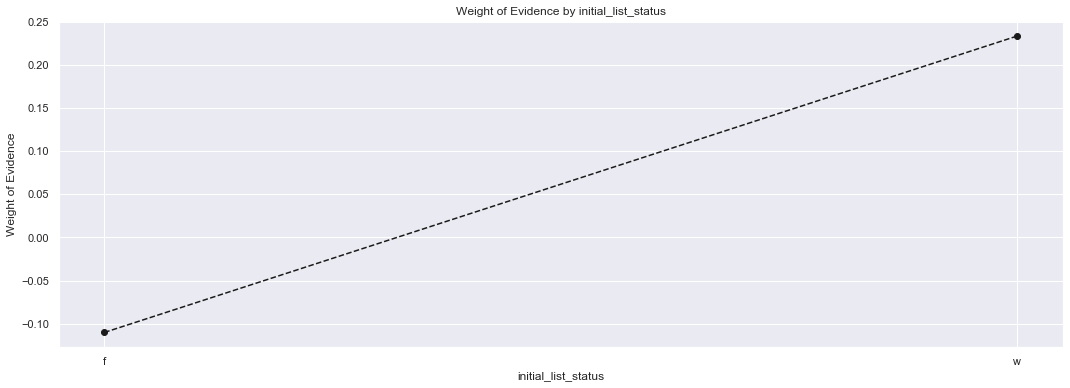

In [69]:
plot_by_woe(df_temp)

## Part 1: Pre-Processing continiuous variable - create dummy variable based on WoE

In [70]:
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [72]:
# term
df_temp = woe_ordered_continuous(train_inputs_prepr, 'term_int', train_targets_prepr)
# We calculate weight of evidence.
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270255,0.903158,0.72449,244083.0,26172.0,0.734442,0.643205,0.132648,NaN,NaN,0.039047
1,60,102773,0.858737,0.27551,88255.0,14518.0,0.265558,0.356795,-0.295329,0.044421,0.427977,0.039047


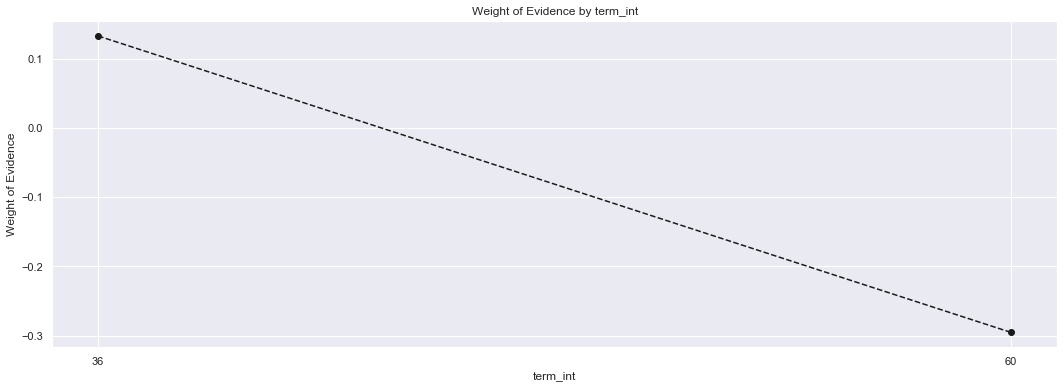

In [73]:
plot_by_woe(df_temp)

In [74]:
train_inputs_prepr['term:36'] = np.where((train_inputs_prepr['term_int'] == 36), 1, 0)
train_inputs_prepr['term:60'] = np.where((train_inputs_prepr['term_int'] == 60), 1, 0)

In [77]:
# emp_length_int
df_temp = woe_ordered_continuous(train_inputs_prepr, 'emp_length_int', train_targets_prepr)
# We calculate weight of evidence.
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,45901,0.875885,0.123050,40204.0,5697.0,0.120973,0.140010,-0.146143,NaN,NaN,0.006896
1,1.0,23671,0.890288,0.063456,21074.0,2597.0,0.063411,0.063824,-0.006487,0.014403,0.139656,0.006896
2,2.0,33023,0.890501,0.088527,29407.0,3616.0,0.088485,0.088867,-0.004306,0.000213,0.002181,0.006896
3,3.0,29346,0.890581,0.078670,26135.0,3211.0,0.078640,0.078914,-0.003477,0.000081,0.000829,0.006896
4,4.0,22385,0.890328,0.060009,19930.0,2455.0,0.059969,0.060334,-0.006071,0.000253,0.002594,0.006896
5,5.0,24633,0.884261,0.066035,21782.0,2851.0,0.065542,0.070066,-0.066756,0.006067,0.060685,0.006896
6,6.0,20945,0.883839,0.056149,18512.0,2433.0,0.055702,0.059794,-0.070876,0.000422,0.004120,0.006896
7,7.0,20933,0.888931,0.056116,18608.0,2325.0,0.055991,0.057139,-0.020299,0.005093,0.050577,0.006896
8,8.0,17823,0.888403,0.047779,15834.0,1989.0,0.047644,0.048882,-0.025643,0.000529,0.005344,0.006896
9,9.0,14359,0.888223,0.038493,12754.0,1605.0,0.038377,0.039445,-0.027449,0.000179,0.001806,0.006896


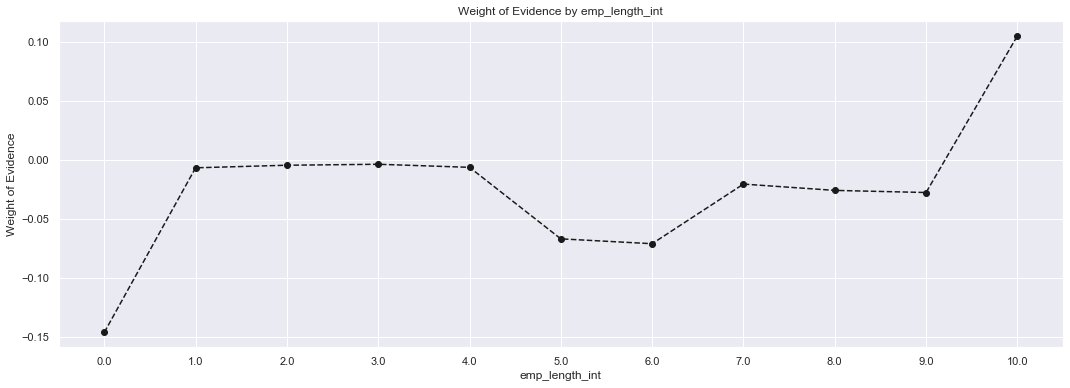

In [78]:
plot_by_woe(df_temp)

In [79]:
train_inputs_prepr['emp_length:0'] = np.where(train_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
train_inputs_prepr['emp_length:1'] = np.where(train_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
train_inputs_prepr['emp_length:2-4'] = np.where(train_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
train_inputs_prepr['emp_length:5-6'] = np.where(train_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
train_inputs_prepr['emp_length:7-9'] = np.where(train_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
train_inputs_prepr['emp_length:10'] = np.where(train_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

## Part 2: Pre-Processing continiuous variable - create dummy variable based on WoE
### Techniques - Fine classing & coarse classing

In [80]:
train_inputs_prepr['mths_since_issue_d'].unique()

array([ 76.,  71.,  63.,  83.,  77.,  70.,  65.,  66.,  64.,  96.,  90.,
        68.,  62., 104.,  98.,  79.,  89., 101.,  82.,  67.,  80.,  72.,
        81., 108.,  87., 106.,  92.,  93.,  95.,  74.,  61., 128., 111.,
       103., 118.,  94.,  69.,  75.,  78.,  85., 120.,  99., 109., 102.,
        73.,  97.,  84., 121.,  88., 105.,  86., 115., 140., 112.,  91.,
       100., 135., 122., 124., 117., 114., 123., 107., 131., 116., 110.,
       127., 134., 125., 143., 113., 142., 119., 130., 138., 132., 133.,
       144., 148., 139., 141., 126., 146., 137., 145., 129., 147., 149.,
       151., 150., 136.])

In [81]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
train_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(train_inputs_prepr['mths_since_issue_d'], 50)

In [84]:
train_inputs_prepr['mths_since_issue_d_factor']

96334     (75.4, 77.2]
443947    (70.0, 71.8]
296821    (62.8, 64.6]
449407    (70.0, 71.8]
168807    (82.6, 84.4]
              ...     
375410    (66.4, 68.2]
329970    (64.6, 66.4]
358990    (64.6, 66.4]
414451    (68.2, 70.0]
108800    (75.4, 77.2]
Name: mths_since_issue_d_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(60.91, 62.8] < (62.8, 64.6] < (64.6, 66.4] < (66.4, 68.2] ... (143.8, 145.6] < (145.6, 147.4] < (147.4, 149.2] < (149.2, 151.0]]

In [85]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(train_inputs_prepr, 'mths_since_issue_d_factor', train_targets_prepr)
# We calculate weight of evidence.
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(60.91, 62.8]",28236,0.943051,0.075694,26628.0,1608.0,0.080123,0.039518,0.706802,NaN,NaN,0.116778
1,"(62.8, 64.6]",39404,0.930210,0.105633,36654.0,2750.0,0.110291,0.067584,0.489751,0.012841,0.217050,0.116778
2,"(64.6, 66.4]",38735,0.917103,0.103839,35524.0,3211.0,0.106891,0.078914,0.303456,0.013107,0.186296,0.116778
3,"(66.4, 68.2]",28985,0.908849,0.077702,26343.0,2642.0,0.079266,0.064930,0.199496,0.008254,0.103960,0.116778
4,"(68.2, 70.0]",28470,0.903758,0.076321,25730.0,2740.0,0.077421,0.067338,0.139530,0.005091,0.059967,0.116778
5,"(70.0, 71.8]",12266,0.898011,0.032882,11015.0,1251.0,0.033144,0.030745,0.075145,0.005748,0.064385,0.116778
6,"(71.8, 73.6]",24466,0.897368,0.065588,21955.0,2511.0,0.066062,0.061710,0.068144,0.000643,0.007001,0.116778
7,"(73.6, 75.4]",23073,0.887748,0.061853,20483.0,2590.0,0.061633,0.063652,-0.032233,0.009620,0.100376,0.116778
8,"(75.4, 77.2]",20569,0.881132,0.055141,18124.0,2445.0,0.054535,0.060088,-0.096978,0.006616,0.064745,0.116778
9,"(77.2, 79.0]",18228,0.868499,0.048865,15831.0,2397.0,0.047635,0.058909,-0.212418,0.012633,0.115440,0.116778


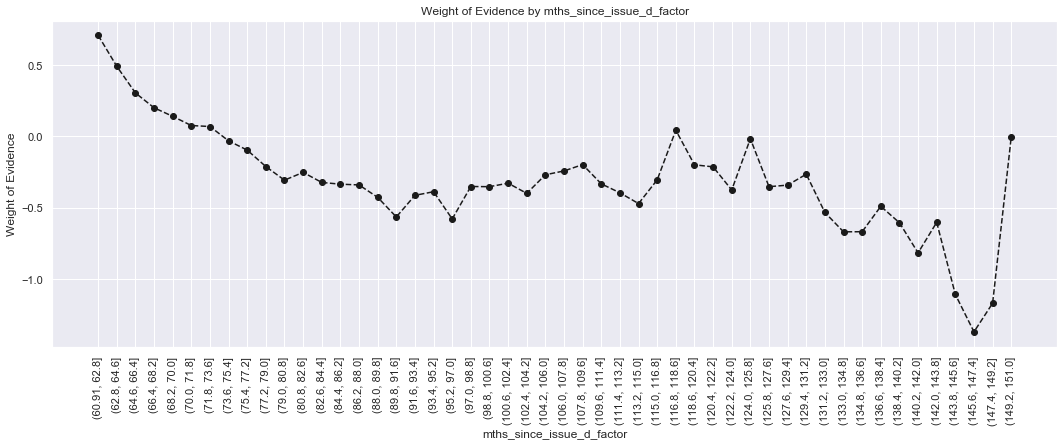

In [86]:
plot_by_woe(df_temp, 90)

In [88]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
train_inputs_prepr['mths_since_issue_d:<38'] = np.where(train_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
train_inputs_prepr['mths_since_issue_d:38-39'] = np.where(train_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
train_inputs_prepr['mths_since_issue_d:40-41'] = np.where(train_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
train_inputs_prepr['mths_since_issue_d:42-48'] = np.where(train_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
train_inputs_prepr['mths_since_issue_d:49-52'] = np.where(train_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
train_inputs_prepr['mths_since_issue_d:53-64'] = np.where(train_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
train_inputs_prepr['mths_since_issue_d:65-84'] = np.where(train_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
train_inputs_prepr['mths_since_issue_d:>84'] = np.where(train_inputs_prepr['mths_since_issue_d'].isin(range(85, int(train_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [96]:
# int_rate
train_inputs_prepr['int_rate_factor'] = pd.cut(train_inputs_prepr['int_rate'], 50)

In [98]:
df_temp = woe_ordered_continuous(train_inputs_prepr, 'int_rate_factor', train_targets_prepr)
# We calculate weight of evidence.
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",776,0.966495,0.002080,750.0,26.0,0.002257,0.000639,1.261807,NaN,NaN,0.342738
1,"(5.833, 6.246]",8495,0.979400,0.022773,8320.0,175.0,0.025035,0.004301,1.761461,0.012905,0.499655,0.342738
2,"(6.246, 6.658]",7789,0.969958,0.020880,7555.0,234.0,0.022733,0.005751,1.374474,0.009442,0.386988,0.342738
3,"(6.658, 7.071]",1851,0.966505,0.004962,1789.0,62.0,0.005383,0.001524,1.262108,0.003453,0.112366,0.342738
4,"(7.071, 7.484]",3151,0.975563,0.008447,3074.0,77.0,0.009250,0.001892,1.586759,0.009059,0.324652,0.342738
5,"(7.484, 7.897]",12759,0.963085,0.034204,12288.0,471.0,0.036974,0.011575,1.161350,0.012478,0.425409,0.342738
6,"(7.897, 8.31]",9675,0.948424,0.025936,9176.0,499.0,0.027610,0.012263,0.811570,0.014661,0.349780,0.342738
7,"(8.31, 8.722]",6624,0.966486,0.017757,6402.0,222.0,0.019264,0.005456,1.261518,0.018062,0.449948,0.342738
8,"(8.722, 9.135]",9528,0.939022,0.025542,8947.0,581.0,0.026921,0.014279,0.634153,0.027464,0.627366,0.342738
9,"(9.135, 9.548]",6636,0.966094,0.017790,6411.0,225.0,0.019291,0.005530,1.249500,0.027072,0.615347,0.342738


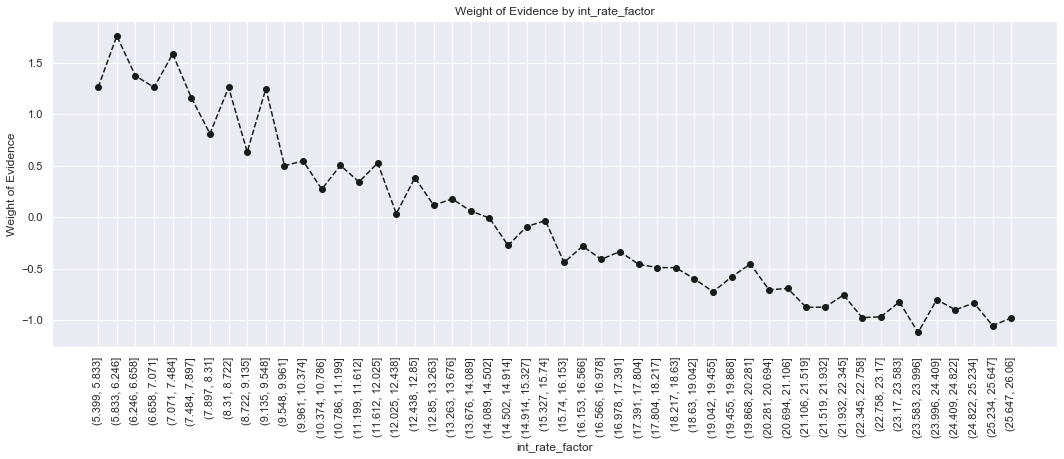

In [99]:
plot_by_woe(df_temp, 90)

In [100]:
train_inputs_prepr['int_rate:<9.548'] = np.where((train_inputs_prepr['int_rate'] <= 9.548), 1, 0)
train_inputs_prepr['int_rate:9.548-12.025'] = np.where((train_inputs_prepr['int_rate'] > 9.548) & (train_inputs_prepr['int_rate'] <= 12.025), 1, 0)
train_inputs_prepr['int_rate:12.025-15.74'] = np.where((train_inputs_prepr['int_rate'] > 12.025) & (train_inputs_prepr['int_rate'] <= 15.74), 1, 0)
train_inputs_prepr['int_rate:15.74-20.281'] = np.where((train_inputs_prepr['int_rate'] > 15.74) & (train_inputs_prepr['int_rate'] <= 20.281), 1, 0)
train_inputs_prepr['int_rate:>20.281'] = np.where((train_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [101]:
# funded_amnt
train_inputs_prepr['funded_amnt_factor'] = pd.cut(train_inputs_prepr['funded_amnt'], 50)
df_temp = woe_ordered_continuous(train_inputs_prepr, 'funded_amnt_factor', train_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1233,0.904298,0.003305,1115.0,118.0,0.003355,0.002900,0.145755,NaN,NaN,0.01508
1,"(1190.0, 1880.0]",3076,0.903446,0.008246,2779.0,297.0,0.008362,0.007299,0.135944,0.000852,0.009811,0.01508
2,"(1880.0, 2570.0]",6029,0.896666,0.016162,5406.0,623.0,0.016267,0.015311,0.060548,0.006780,0.075396,0.01508
3,"(2570.0, 3260.0]",7229,0.888505,0.019379,6423.0,806.0,0.019327,0.019808,-0.024613,0.008161,0.085161,0.01508
4,"(3260.0, 3950.0]",4723,0.889477,0.012661,4201.0,522.0,0.012641,0.012829,-0.014760,0.000972,0.009853,0.01508
5,"(3950.0, 4640.0]",9051,0.887637,0.024264,8034.0,1017.0,0.024174,0.024994,-0.033345,0.001840,0.018585,0.01508
6,"(4640.0, 5330.0]",15930,0.894727,0.042705,14253.0,1677.0,0.042887,0.041214,0.039791,0.007090,0.073136,0.01508
7,"(5330.0, 6020.0]",17053,0.906585,0.045715,15460.0,1593.0,0.046519,0.039150,0.172467,0.011858,0.132676,0.01508
8,"(6020.0, 6710.0]",6904,0.888326,0.018508,6133.0,771.0,0.018454,0.018948,-0.026419,0.018260,0.198886,0.01508
9,"(6710.0, 7400.0]",11667,0.899031,0.031276,10489.0,1178.0,0.031561,0.028951,0.086339,0.010706,0.112758,0.01508


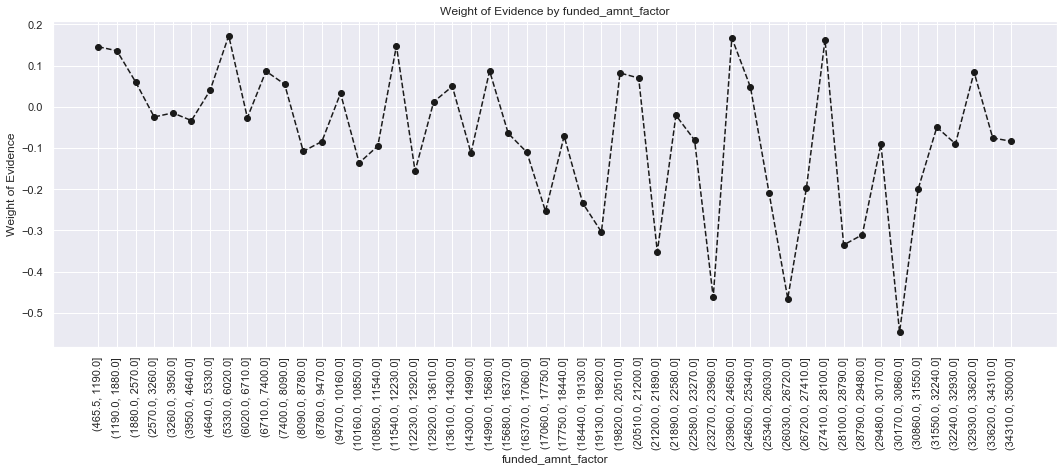

In [102]:
plot_by_woe(df_temp, 90)

In [103]:
# mths_since_earliest_cr_line
train_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(train_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(train_inputs_prepr, 'mths_since_earliest_cr_line_factor', train_targets_prepr)
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.612, 12.24]",24,0.875000,0.000064,21.0,3.0,0.000063,0.000074,-0.154260,NaN,NaN,0.016117
1,"(12.24, 24.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016117
2,"(24.48, 36.72]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016117
3,"(36.72, 48.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016117
4,"(48.96, 61.2]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016117
5,"(61.2, 73.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016117
6,"(73.44, 85.68]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016117
7,"(85.68, 97.92]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016117
8,"(97.92, 110.16]",1148,0.905923,0.003078,1040.0,108.0,0.003129,0.002654,0.164675,NaN,NaN,0.016117
9,"(110.16, 122.4]",2329,0.873766,0.006243,2035.0,294.0,0.006123,0.007225,-0.165499,0.032158,0.330173,0.016117


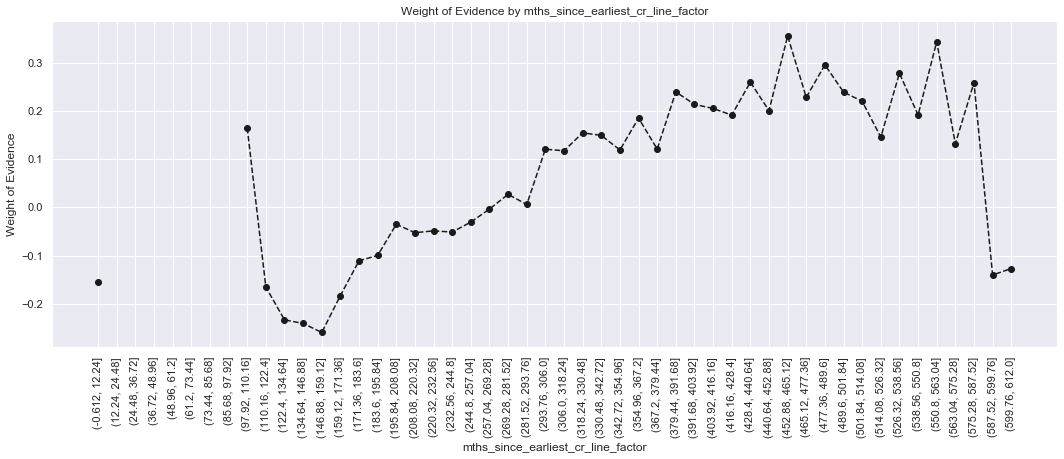

In [104]:
plot_by_woe(df_temp, 90)

In [105]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
train_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(train_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
train_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(train_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
train_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(train_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
train_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(train_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
train_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(train_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
train_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(train_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(train_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [106]:
# delinq_2yrs
df_temp = woe_ordered_continuous(train_inputs_prepr, 'delinq_2yrs', train_targets_prepr)
# We calculate weight of evidence.
df_temp

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,306570,0.890916,0.821842,273128.0,33442.0,0.821838,0.821873,-0.000042,NaN,NaN,inf
1,1.0,44893,0.891832,0.120348,40037.0,4856.0,0.120471,0.119341,0.009419,0.000916,0.009461,inf
2,2.0,12992,0.888624,0.034828,11545.0,1447.0,0.034739,0.035562,-0.023410,0.003208,0.032829,inf
3,3.0,4518,0.886676,0.012112,4006.0,512.0,0.012054,0.012583,-0.042946,0.001948,0.019536,inf
4,4.0,1871,0.895243,0.005016,1675.0,196.0,0.005040,0.004817,0.045284,0.008568,0.088230,inf
5,5.0,992,0.900202,0.002659,893.0,99.0,0.002687,0.002433,0.099297,0.004958,0.054013,inf
6,6.0,517,0.897485,0.001386,464.0,53.0,0.001396,0.001303,0.069422,0.002716,0.029874,inf
7,7.0,283,0.869258,0.000759,246.0,37.0,0.000740,0.000909,-0.205757,0.028228,0.275179,inf
8,8.0,139,0.913669,0.000373,127.0,12.0,0.000382,0.000295,0.259110,0.044411,0.464867,inf
9,9.0,94,0.893617,0.000252,84.0,10.0,0.000253,0.000246,0.028062,0.020052,0.231049,inf


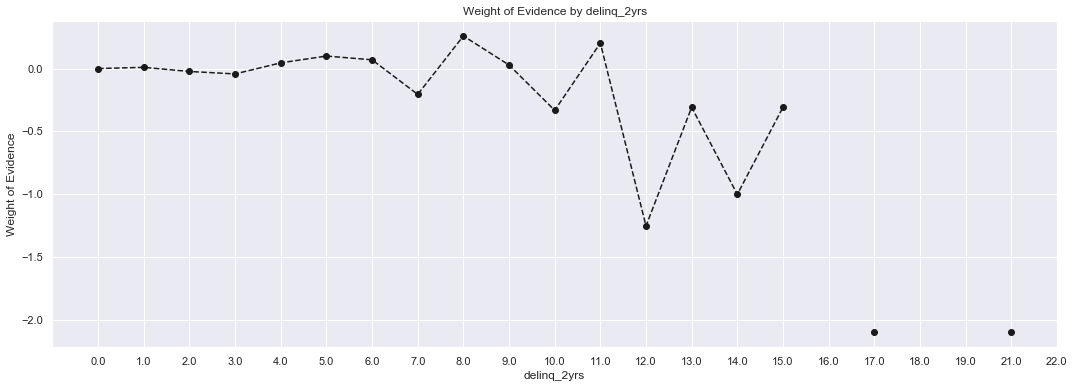

In [107]:
plot_by_woe(df_temp)

In [108]:
train_inputs_prepr['delinq_2yrs:0'] = np.where((train_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
train_inputs_prepr['delinq_2yrs:1-3'] = np.where((train_inputs_prepr['delinq_2yrs'] >= 1) & (train_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
train_inputs_prepr['delinq_2yrs:>=4'] = np.where((train_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [109]:
# inq_last_6mths
df_temp = woe_ordered_continuous(train_inputs_prepr, 'inq_last_6mths', train_targets_prepr)
# We calculate weight of evidence.
df_temp

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,193454,0.908785,0.518605,175808.0,17646.0,0.529004,0.433669,0.198713,NaN,NaN,inf
1,1.0,104006,0.884459,0.278816,91989.0,12017.0,0.276794,0.295331,-0.064823,0.024326,0.263537,inf
2,2.0,46125,0.864369,0.123650,39869.0,6256.0,0.119965,0.153748,-0.248112,0.020090,0.183289,inf
3,3.0,20118,0.842380,0.053932,16947.0,3171.0,0.050993,0.077931,-0.424126,0.021989,0.176014,inf
4,4.0,5801,0.848130,0.015551,4920.0,881.0,0.014804,0.021652,-0.380164,0.005750,0.043962,inf
5,5.0,2197,0.823396,0.005890,1809.0,388.0,0.005443,0.009536,-0.560646,0.024734,0.180482,inf
6,6.0,963,0.788162,0.002582,759.0,204.0,0.002284,0.005014,-0.786288,0.035234,0.225642,inf
7,7.0,155,0.651613,0.000416,101.0,54.0,0.000304,0.001327,-1.474034,0.136549,0.687745,inf
8,8.0,94,0.638298,0.000252,60.0,34.0,0.000181,0.000836,-1.532186,0.013315,0.058152,inf
9,9.0,39,0.641026,0.000105,25.0,14.0,0.000075,0.000344,-1.520352,0.002728,0.011834,inf


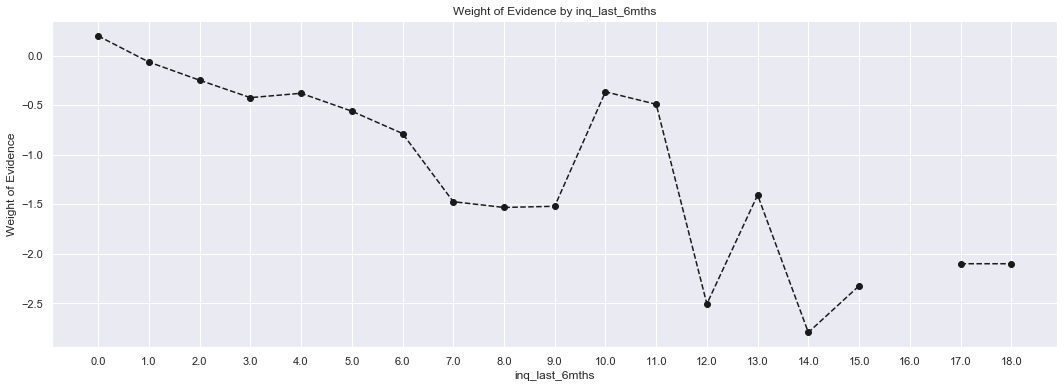

In [110]:
plot_by_woe(df_temp)

In [111]:
train_inputs_prepr['inq_last_6mths:0'] = np.where((train_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
train_inputs_prepr['inq_last_6mths:1-2'] = np.where((train_inputs_prepr['inq_last_6mths'] >= 1) & (train_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
train_inputs_prepr['inq_last_6mths:3-6'] = np.where((train_inputs_prepr['inq_last_6mths'] >= 3) & (train_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
train_inputs_prepr['inq_last_6mths:>6'] = np.where((train_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [112]:
# open_acc
df_temp = woe_ordered_continuous(train_inputs_prepr, 'open_acc', train_targets_prepr)
df_temp

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,31,0.774194,0.000083,24.0,7.0,0.000072,0.000172,-0.868026,NaN,NaN,inf
1,1.0,113,0.849558,0.000303,96.0,17.0,0.000289,0.000418,-0.369035,0.075364,0.498991,inf
2,2.0,1417,0.839097,0.003799,1189.0,228.0,0.003578,0.005603,-0.448648,0.010461,0.079613,inf
3,3.0,4388,0.865770,0.011763,3799.0,589.0,0.011431,0.014475,-0.236103,0.026674,0.212545,inf
4,4.0,10061,0.892655,0.026971,8981.0,1080.0,0.027024,0.026542,0.017980,0.026885,0.254083,inf
5,5.0,17150,0.893294,0.045975,15320.0,1830.0,0.046098,0.044974,0.024673,0.000640,0.006693,inf
6,6.0,24651,0.893229,0.066084,22019.0,2632.0,0.066255,0.064684,0.023992,0.000065,0.000681,inf
7,7.0,29976,0.890012,0.080359,26679.0,3297.0,0.080277,0.081027,-0.009306,0.003217,0.033298,inf
8,8.0,33406,0.892834,0.089554,29826.0,3580.0,0.089746,0.087982,0.019848,0.002822,0.029154,inf
9,9.0,35152,0.889565,0.094234,31270.0,3882.0,0.094091,0.095404,-0.013861,0.003268,0.033709,inf


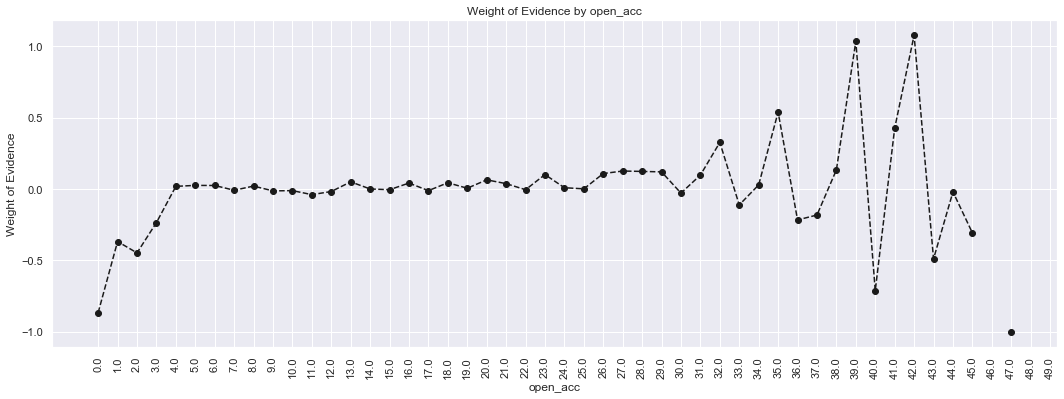

In [113]:
plot_by_woe(df_temp, 90)

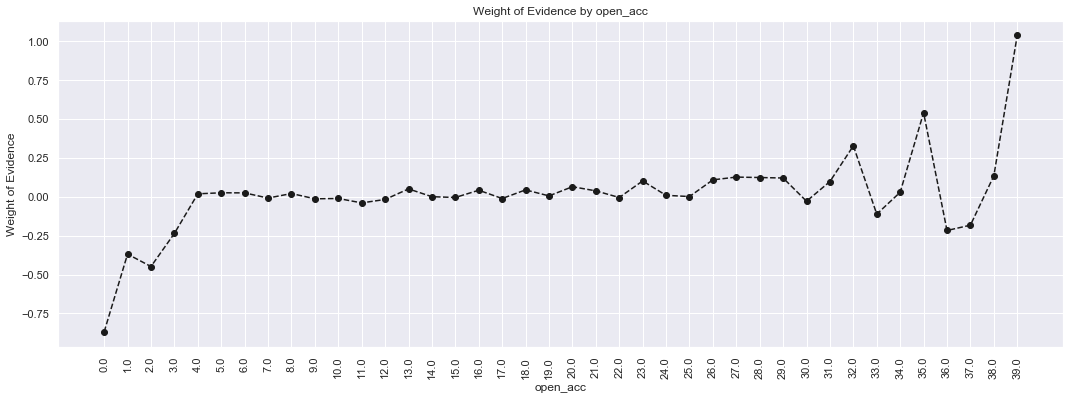

In [114]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [115]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
train_inputs_prepr['open_acc:0'] = np.where((train_inputs_prepr['open_acc'] == 0), 1, 0)
train_inputs_prepr['open_acc:1-3'] = np.where((train_inputs_prepr['open_acc'] >= 1) & (train_inputs_prepr['open_acc'] <= 3), 1, 0)
train_inputs_prepr['open_acc:4-12'] = np.where((train_inputs_prepr['open_acc'] >= 4) & (train_inputs_prepr['open_acc'] <= 12), 1, 0)
train_inputs_prepr['open_acc:13-17'] = np.where((train_inputs_prepr['open_acc'] >= 13) & (train_inputs_prepr['open_acc'] <= 17), 1, 0)
train_inputs_prepr['open_acc:18-22'] = np.where((train_inputs_prepr['open_acc'] >= 18) & (train_inputs_prepr['open_acc'] <= 22), 1, 0)
train_inputs_prepr['open_acc:23-25'] = np.where((train_inputs_prepr['open_acc'] >= 23) & (train_inputs_prepr['open_acc'] <= 25), 1, 0)
train_inputs_prepr['open_acc:26-30'] = np.where((train_inputs_prepr['open_acc'] >= 26) & (train_inputs_prepr['open_acc'] <= 30), 1, 0)
train_inputs_prepr['open_acc:>=31'] = np.where((train_inputs_prepr['open_acc'] >= 31), 1, 0)

In [116]:
# pub_rec
df_temp = woe_ordered_continuous(train_inputs_prepr, 'pub_rec', train_targets_prepr)
df_temp

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,323904,0.889937,0.868310,288254.0,35650.0,0.867352,0.876137,-0.010077,NaN,NaN,inf
1,1.0,42464,0.895865,0.113836,38042.0,4422.0,0.114468,0.108675,0.051929,0.005928,0.062006,inf
2,2.0,4503,0.902287,0.012071,4063.0,440.0,0.012226,0.010813,0.122732,0.006423,0.070803,inf
3,3.0,1273,0.918303,0.003413,1169.0,104.0,0.003518,0.002556,0.319343,0.016016,0.196611,inf
4,4.0,427,0.908665,0.001145,388.0,39.0,0.001167,0.000958,0.197274,0.009638,0.122069,inf
5,5.0,225,0.897778,0.000603,202.0,23.0,0.000608,0.000565,0.072603,0.010887,0.124670,inf
6,6.0,108,0.935185,0.000290,101.0,7.0,0.000304,0.000172,0.569040,0.037407,0.496437,inf
7,7.0,47,0.978723,0.000126,46.0,1.0,0.000138,0.000025,1.728471,0.043538,1.159431,inf
8,8.0,25,0.960000,0.000067,24.0,1.0,0.000072,0.000025,1.077884,0.018723,0.650588,inf
9,9.0,15,0.800000,0.000040,12.0,3.0,0.000036,0.000074,-0.713876,0.160000,1.791759,inf


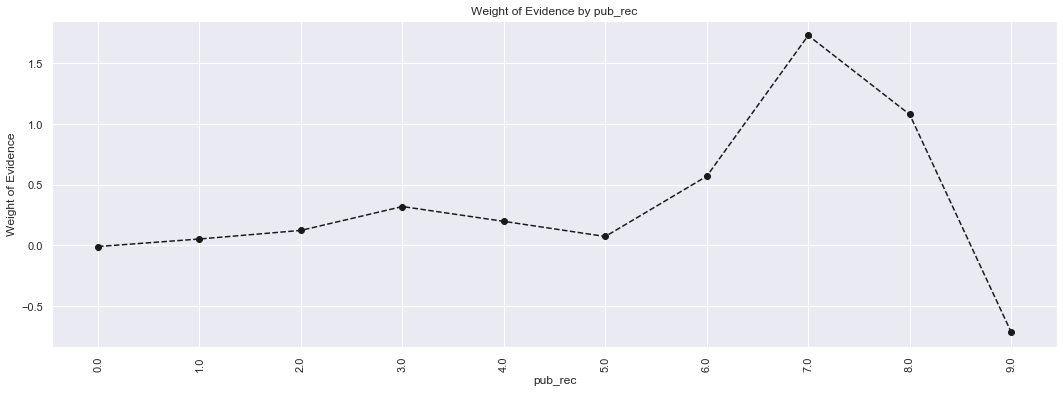

In [117]:
plot_by_woe(df_temp, 90)

In [118]:
# Categories '0-2', '3-4', '>=5'
train_inputs_prepr['pub_rec:0-2'] = np.where((train_inputs_prepr['pub_rec'] >= 0) & (train_inputs_prepr['pub_rec'] <= 2), 1, 0)
train_inputs_prepr['pub_rec:3-4'] = np.where((train_inputs_prepr['pub_rec'] >= 3) & (train_inputs_prepr['pub_rec'] <= 4), 1, 0)
train_inputs_prepr['pub_rec:>=5'] = np.where((train_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [119]:
# total_acc
train_inputs_prepr['total_acc_factor'] = pd.cut(train_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(train_inputs_prepr, 'total_acc_factor', train_targets_prepr)
df_temp

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.156, 3.12]",476,0.817227,0.001276,389.0,87.0,0.001170,0.002138,-0.602499,NaN,NaN,inf
1,"(3.12, 6.24]",5964,0.861670,0.015988,5139.0,825.0,0.015463,0.020275,-0.270940,0.044443,0.331559,inf
2,"(6.24, 9.36]",14982,0.874182,0.040163,13097.0,1885.0,0.039409,0.046326,-0.161715,0.012512,0.109225,inf
3,"(9.36, 12.48]",25087,0.881213,0.067252,22107.0,2980.0,0.066520,0.073237,-0.096199,0.007031,0.065516,inf
4,"(12.48, 15.6]",33533,0.883070,0.089894,29612.0,3921.0,0.089102,0.096363,-0.078337,0.001857,0.017862,inf
5,"(15.6, 18.72]",38796,0.887024,0.104003,34413.0,4383.0,0.103548,0.107717,-0.039469,0.003954,0.038868,inf
6,"(18.72, 21.84]",40664,0.887935,0.109011,36107.0,4557.0,0.108645,0.111993,-0.030348,0.000911,0.009121,inf
7,"(21.84, 24.96]",40152,0.891961,0.107638,35814.0,4338.0,0.107764,0.106611,0.010755,0.004025,0.041103,inf
8,"(24.96, 28.08]",47435,0.895330,0.127162,42470.0,4965.0,0.127792,0.122020,0.046214,0.003370,0.035459,inf
9,"(28.08, 31.2]",29653,0.896773,0.079493,26592.0,3061.0,0.080015,0.075227,0.061699,0.001442,0.015484,inf


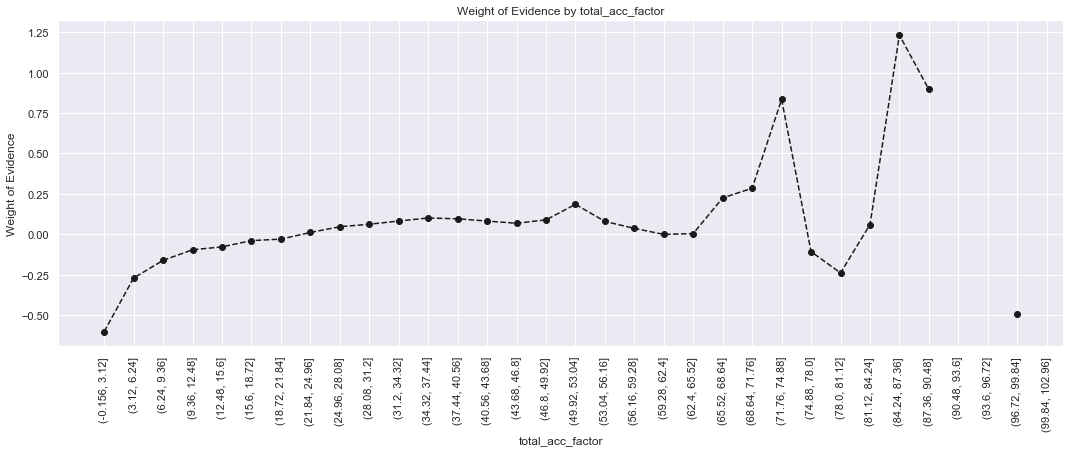

In [120]:
plot_by_woe(df_temp, 90)

In [121]:
# Categories: '<=27', '28-51', '>51'
train_inputs_prepr['total_acc:<=27'] = np.where((train_inputs_prepr['total_acc'] <= 27), 1, 0)
train_inputs_prepr['total_acc:28-51'] = np.where((train_inputs_prepr['total_acc'] >= 28) & (train_inputs_prepr['total_acc'] <= 51), 1, 0)
train_inputs_prepr['total_acc:>=52'] = np.where((train_inputs_prepr['total_acc'] >= 52), 1, 0)

In [122]:
# acc_now_delinq
df_temp = woe_ordered_continuous(train_inputs_prepr, 'acc_now_delinq', train_targets_prepr)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,371662,0.890906,0.996338,331116.0,40546.0,0.996323,0.996461,-0.000139,NaN,NaN,inf
1,1.0,1279,0.895231,0.003429,1145.0,134.0,0.003445,0.003293,0.045150,0.004324,0.045288,inf
2,2.0,73,0.904110,0.000196,66.0,7.0,0.000199,0.000172,0.143574,0.008879,0.098424,inf
3,3.0,9,0.777778,0.000024,7.0,2.0,0.000021,0.000049,-0.847407,0.126332,0.990982,inf
4,4.0,3,1.000000,0.000008,3.0,0.0,0.000009,0.000000,inf,0.222222,inf,inf
5,5.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000025,-2.100170,0.500000,inf,inf


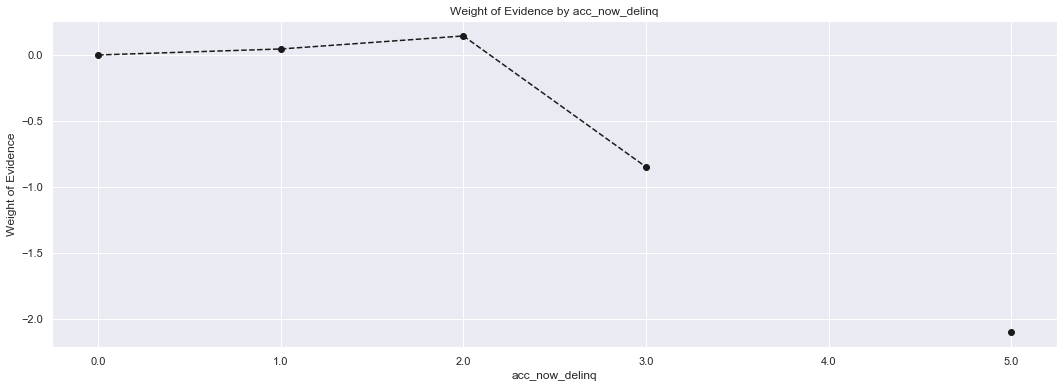

In [123]:
plot_by_woe(df_temp)

In [124]:
# Categories: '0', '>=1'
train_inputs_prepr['acc_now_delinq:0'] = np.where((train_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
train_inputs_prepr['acc_now_delinq:>=1'] = np.where((train_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [125]:
# total_rev_hi_lim
train_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(train_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(train_inputs_prepr, 'total_rev_hi_lim_factor', train_targets_prepr)
df_temp

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",19329,0.865798,0.051816,16735.0,2594.0,0.050355,0.063750,-0.235869,NaN,NaN,inf
1,"(5000.0, 9999.999]",52559,0.876253,0.140898,46055.0,6504.0,0.138579,0.159843,-0.142751,0.010456,0.093118,inf
2,"(9999.999, 14999.998]",59367,0.880893,0.159149,52296.0,7071.0,0.157358,0.173777,-0.099252,0.004640,0.043499,inf
3,"(14999.998, 19999.998]",51361,0.878682,0.137687,45130.0,6231.0,0.135795,0.153133,-0.120160,0.002211,0.020908,inf
4,"(19999.998, 24999.997]",41760,0.886662,0.111949,37027.0,4733.0,0.111414,0.116319,-0.043082,0.007980,0.077078,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


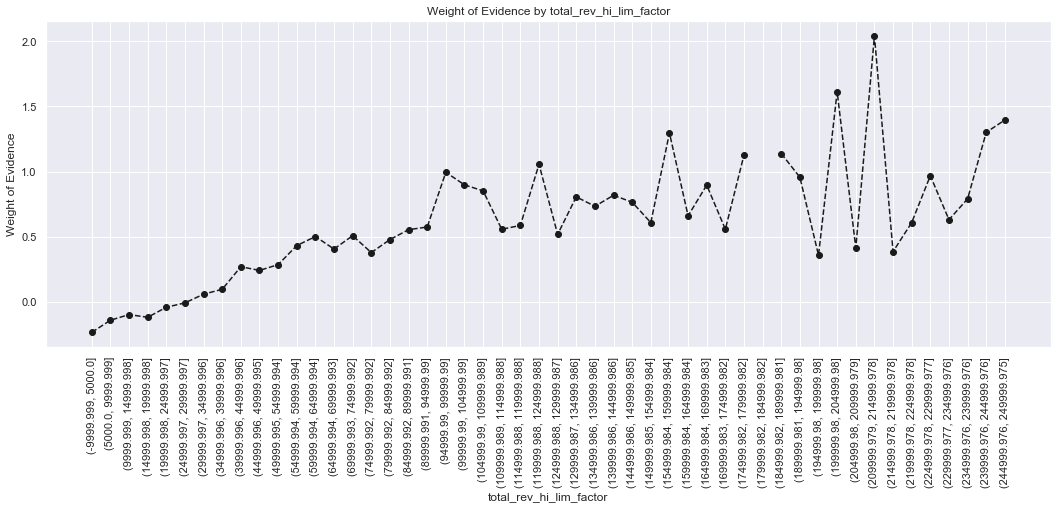

In [126]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [127]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
train_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((train_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
train_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((train_inputs_prepr['total_rev_hi_lim'] > 5000) & (train_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
train_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((train_inputs_prepr['total_rev_hi_lim'] > 10000) & (train_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
train_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((train_inputs_prepr['total_rev_hi_lim'] > 20000) & (train_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
train_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((train_inputs_prepr['total_rev_hi_lim'] > 30000) & (train_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
train_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((train_inputs_prepr['total_rev_hi_lim'] > 40000) & (train_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
train_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((train_inputs_prepr['total_rev_hi_lim'] > 55000) & (train_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
train_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((train_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [128]:
# installment
train_inputs_prepr['installment_factor'] = pd.cut(train_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(train_inputs_prepr, 'installment_factor', train_targets_prepr)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1842,0.903366,0.004938,1664.0,178.0,0.005007,0.004375,0.135026,NaN,NaN,0.013934
1,"(43.556, 71.443]",4851,0.899402,0.013004,4363.0,488.0,0.013128,0.011993,0.090430,0.003964,0.044596,0.013934
2,"(71.443, 99.329]",6855,0.893654,0.018377,6126.0,729.0,0.018433,0.017916,0.028453,0.005748,0.061976,0.013934
3,"(99.329, 127.216]",9080,0.890859,0.024341,8089.0,991.0,0.024340,0.024355,-0.000624,0.002795,0.029078,0.013934
4,"(127.216, 155.102]",10085,0.892315,0.027036,8999.0,1086.0,0.027078,0.026690,0.014442,0.001456,0.015066,0.013934
5,"(155.102, 182.988]",16790,0.895533,0.045010,15036.0,1754.0,0.045243,0.043106,0.048378,0.003218,0.033936,0.013934
6,"(182.988, 210.875]",17019,0.906164,0.045624,15422.0,1597.0,0.046405,0.039248,0.167498,0.010631,0.119120,0.013934
7,"(210.875, 238.761]",15004,0.900493,0.040222,13511.0,1493.0,0.040654,0.036692,0.102546,0.005670,0.064952,0.013934
8,"(238.761, 266.648]",18773,0.901774,0.050326,16929.0,1844.0,0.050939,0.045318,0.116921,0.001281,0.014374,0.013934
9,"(266.648, 294.534]",20023,0.891175,0.053677,17844.0,2179.0,0.053692,0.053551,0.002631,0.010599,0.114290,0.013934


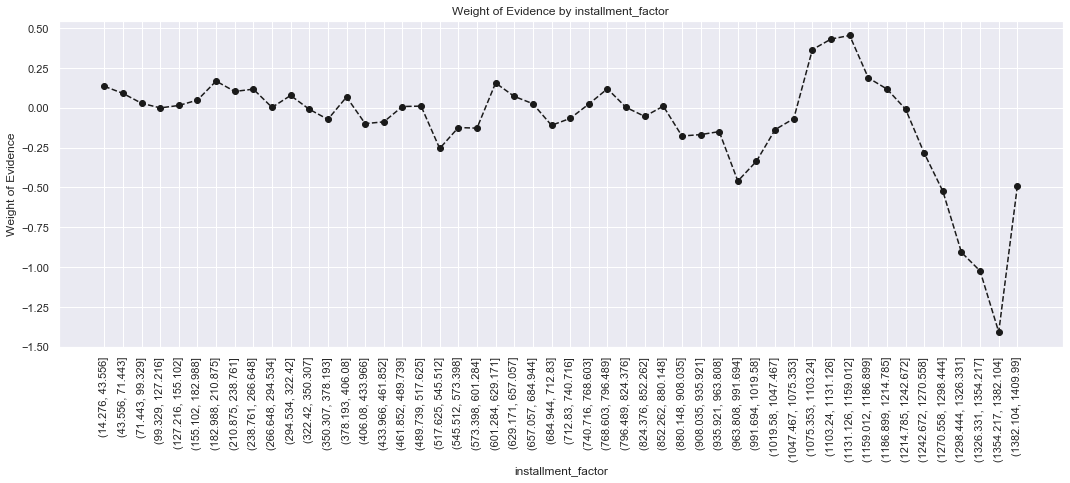

In [129]:
plot_by_woe(df_temp, 90)

## Part 3: Pre-Processing continiuous variable - create dummy variable based on WoE

In [130]:
# annual_inc
train_inputs_prepr['annual_inc_factor'] = pd.cut(train_inputs_prepr['annual_inc'], 50)
df_temp = woe_ordered_continuous(train_inputs_prepr, 'annual_inc_factor', train_targets_prepr)
df_temp

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5602.104, 151858.08]",356632,0.889200,0.956046,317117.0,39515.0,0.954200,0.971123,-0.017580,NaN,NaN,inf
1,"(151858.08, 301820.16]",14801,0.927437,0.039678,13727.0,1074.0,0.041304,0.026395,0.447805,0.038238,0.465384,inf
2,"(301820.16, 451782.24]",1069,0.936389,0.002866,1001.0,68.0,0.003012,0.001671,0.589077,0.008952,0.141272,inf
3,"(451782.24, 601744.32]",295,0.945763,0.000791,279.0,16.0,0.000840,0.000393,0.758453,0.009374,0.169376,inf
4,"(601744.32, 751706.4]",92,0.902174,0.000247,83.0,9.0,0.000250,0.000221,0.121446,0.043589,0.637007,inf
5,"(751706.4, 901668.48]",63,0.904762,0.000169,57.0,6.0,0.000172,0.000147,0.151122,0.002588,0.029676,inf
6,"(901668.48, 1051630.56]",27,0.962963,0.000072,26.0,1.0,0.000078,0.000025,1.157926,0.058201,1.006805,inf
7,"(1051630.56, 1201592.64]",18,1.000000,0.000048,18.0,0.0,0.000054,0.000000,inf,0.037037,inf,inf
8,"(1201592.64, 1351554.72]",9,0.888889,0.000024,8.0,1.0,0.000024,0.000025,-0.020729,0.111111,inf,inf
9,"(1351554.72, 1501516.8]",5,1.000000,0.000013,5.0,0.0,0.000015,0.000000,inf,0.111111,inf,inf


In [131]:
# annual_inc
train_inputs_prepr['annual_inc_factor'] = pd.cut(train_inputs_prepr['annual_inc'], 100)
df_temp = woe_ordered_continuous(train_inputs_prepr, 'annual_inc_factor', train_targets_prepr)
df_temp

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5602.104, 76877.04]",245055,0.877660,0.656935,215075.0,29980.0,0.647157,0.736790,-0.129714,NaN,NaN,inf
1,"(76877.04, 151858.08]",111577,0.914543,0.299112,102042.0,9535.0,0.307043,0.234333,0.270245,0.036883,0.399959,inf
2,"(151858.08, 226839.12]",11939,0.927800,0.032006,11077.0,862.0,0.033331,0.021185,0.453201,0.013256,0.182956,inf
3,"(226839.12, 301820.16]",2862,0.925926,0.007672,2650.0,212.0,0.007974,0.005210,0.425558,0.001874,0.027642,inf
4,"(301820.16, 376801.2]",673,0.934621,0.001804,629.0,44.0,0.001893,0.001081,0.559771,0.008695,0.134213,inf
5,"(376801.2, 451782.24]",396,0.939394,0.001062,372.0,24.0,0.001119,0.000590,0.640670,0.004773,0.080898,inf
6,"(451782.24, 526763.28]",185,0.956757,0.000496,177.0,8.0,0.000533,0.000197,0.996538,0.017363,0.355868,inf
7,"(526763.28, 601744.32]",110,0.927273,0.000295,102.0,8.0,0.000307,0.000197,0.445361,0.029484,0.551177,inf
8,"(601744.32, 676725.36]",43,0.906977,0.000115,39.0,4.0,0.000117,0.000098,0.177097,0.020296,0.268264,inf
9,"(676725.36, 751706.4]",49,0.897959,0.000131,44.0,5.0,0.000132,0.000123,0.074582,0.009018,0.102516,inf


In [133]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = train_inputs_prepr.loc[train_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [135]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', train_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1757.896, 4658.08]",10,0.900000,0.000028,9.0,1.0,0.000029,0.000026,0.119759,NaN,NaN,0.048898
1,"(4658.08, 7420.16]",40,0.750000,0.000114,30.0,10.0,0.000096,0.000256,-0.978853,0.150000,1.098612,0.048898
2,"(7420.16, 10182.24]",301,0.853821,0.000858,257.0,44.0,0.000824,0.001126,-0.312579,0.103821,0.666274,0.048898
3,"(10182.24, 12944.32]",551,0.813067,0.001570,448.0,103.0,0.001436,0.002636,-0.607401,0.040753,0.294822,0.048898
4,"(12944.32, 15706.4]",1178,0.829372,0.003356,977.0,201.0,0.003132,0.005145,-0.496284,0.016305,0.111117,0.048898
5,"(15706.4, 18468.48]",1543,0.839274,0.004396,1295.0,248.0,0.004152,0.006348,-0.424628,0.009902,0.071655,0.048898
6,"(18468.48, 21230.56]",2925,0.848889,0.008333,2483.0,442.0,0.007960,0.011313,-0.351553,0.009615,0.073076,0.048898
7,"(21230.56, 23992.64]",2580,0.847674,0.007350,2187.0,393.0,0.007011,0.010059,-0.360989,0.001214,0.009436,0.048898
8,"(23992.64, 26754.72]",6989,0.852482,0.019911,5958.0,1031.0,0.019100,0.026389,-0.323260,0.004808,0.037729,0.048898
9,"(26754.72, 29516.8]",5603,0.859896,0.015963,4818.0,785.0,0.015446,0.020093,-0.263035,0.007414,0.060225,0.048898


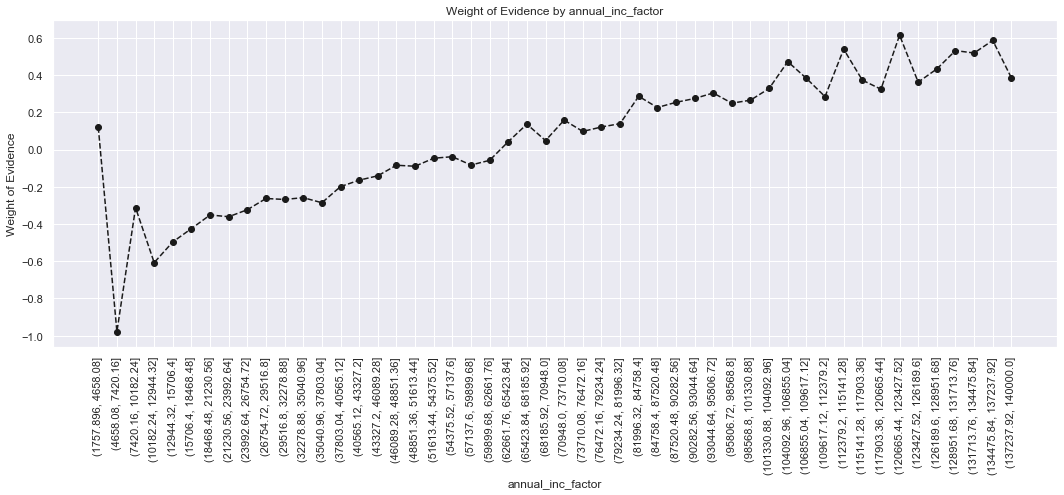

In [136]:
plot_by_woe(df_temp, 90)

In [137]:
train_inputs_prepr['annual_inc:<20K'] = np.where((train_inputs_prepr['annual_inc'] <= 20000), 1, 0)
train_inputs_prepr['annual_inc:20K-30K'] = np.where((train_inputs_prepr['annual_inc'] > 20000) & (train_inputs_prepr['annual_inc'] <= 30000), 1, 0)
train_inputs_prepr['annual_inc:30K-40K'] = np.where((train_inputs_prepr['annual_inc'] > 30000) & (train_inputs_prepr['annual_inc'] <= 40000), 1, 0)
train_inputs_prepr['annual_inc:40K-50K'] = np.where((train_inputs_prepr['annual_inc'] > 40000) & (train_inputs_prepr['annual_inc'] <= 50000), 1, 0)
train_inputs_prepr['annual_inc:50K-60K'] = np.where((train_inputs_prepr['annual_inc'] > 50000) & (train_inputs_prepr['annual_inc'] <= 60000), 1, 0)
train_inputs_prepr['annual_inc:60K-70K'] = np.where((train_inputs_prepr['annual_inc'] > 60000) & (train_inputs_prepr['annual_inc'] <= 70000), 1, 0)
train_inputs_prepr['annual_inc:70K-80K'] = np.where((train_inputs_prepr['annual_inc'] > 70000) & (train_inputs_prepr['annual_inc'] <= 80000), 1, 0)
train_inputs_prepr['annual_inc:80K-90K'] = np.where((train_inputs_prepr['annual_inc'] > 80000) & (train_inputs_prepr['annual_inc'] <= 90000), 1, 0)
train_inputs_prepr['annual_inc:90K-100K'] = np.where((train_inputs_prepr['annual_inc'] > 90000) & (train_inputs_prepr['annual_inc'] <= 100000), 1, 0)
train_inputs_prepr['annual_inc:100K-120K'] = np.where((train_inputs_prepr['annual_inc'] > 100000) & (train_inputs_prepr['annual_inc'] <= 120000), 1, 0)
train_inputs_prepr['annual_inc:120K-140K'] = np.where((train_inputs_prepr['annual_inc'] > 120000) & (train_inputs_prepr['annual_inc'] <= 140000), 1, 0)
train_inputs_prepr['annual_inc:>140K'] = np.where((train_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [138]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = train_inputs_prepr[pd.notnull(train_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', train_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",5251,0.872024,0.030449,4579.0,672.0,0.029752,0.036238,-0.197218,NaN,NaN,inf
1,"(3.76, 7.52]",11122,0.885902,0.064494,9853.0,1269.0,0.064020,0.068432,-0.066649,0.013877,0.130569,inf
2,"(7.52, 11.28]",13296,0.894404,0.077101,11892.0,1404.0,0.077268,0.075712,0.020345,0.008503,0.086994,inf
3,"(11.28, 15.04]",13229,0.886688,0.076712,11730.0,1499.0,0.076215,0.080835,-0.058844,0.007716,0.079189,inf
4,"(15.04, 18.8]",9335,0.894483,0.054132,8350.0,985.0,0.054254,0.053117,0.021179,0.007795,0.080024,inf
5,"(18.8, 22.56]",11558,0.891417,0.067022,10303.0,1255.0,0.066943,0.067677,-0.010896,0.003066,0.032076,inf
6,"(22.56, 26.32]",10823,0.897625,0.062760,9715.0,1108.0,0.063123,0.059750,0.054919,0.006208,0.065815,inf
7,"(26.32, 30.08]",10576,0.897315,0.061328,9490.0,1086.0,0.061661,0.058563,0.051542,0.000311,0.003377,inf
8,"(30.08, 33.84]",7533,0.900305,0.043682,6782.0,751.0,0.044066,0.040498,0.084426,0.002991,0.032884,inf
9,"(33.84, 37.6]",9715,0.897684,0.056335,8721.0,994.0,0.056664,0.053602,0.055556,0.002621,0.028870,inf


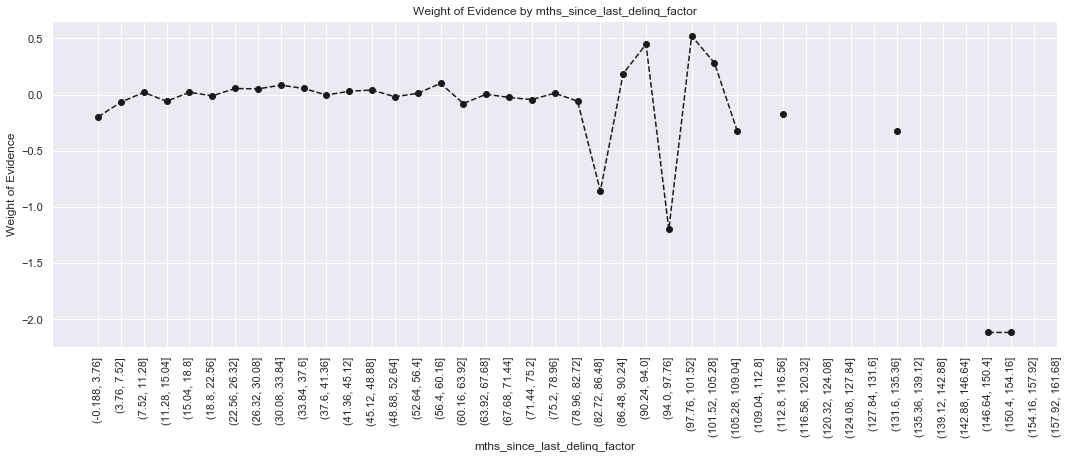

In [139]:
plot_by_woe(df_temp, 90)

In [140]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
train_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((train_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
train_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((train_inputs_prepr['mths_since_last_delinq'] >= 0) & (train_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
train_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((train_inputs_prepr['mths_since_last_delinq'] >= 4) & (train_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
train_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((train_inputs_prepr['mths_since_last_delinq'] >= 31) & (train_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
train_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((train_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [141]:
# dti
train_inputs_prepr['dti_factor'] = pd.cut(train_inputs_prepr['dti'], 100)
df_temp = woe_ordered_continuous(train_inputs_prepr, 'dti_factor', train_targets_prepr)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",728,0.876374,0.001952,638.0,90.0,0.001920,0.002212,-0.141642,NaN,NaN,0.028335
1,"(0.4, 0.8]",805,0.909317,0.002158,732.0,73.0,0.002203,0.001794,0.205151,0.032943,0.346792,0.028335
2,"(0.8, 1.2]",902,0.893570,0.002418,806.0,96.0,0.002425,0.002359,0.027565,0.015747,0.177586,0.028335
3,"(1.2, 1.6]",1018,0.894892,0.002729,911.0,107.0,0.002741,0.002630,0.041544,0.001322,0.013979,0.028335
4,"(1.6, 2.0]",1196,0.903846,0.003206,1081.0,115.0,0.003253,0.002826,0.140540,0.008954,0.098996,0.028335
5,"(2.0, 2.399]",1310,0.906107,0.003512,1187.0,123.0,0.003572,0.003023,0.166830,0.002261,0.026290,0.028335
6,"(2.399, 2.799]",1501,0.920053,0.004024,1381.0,120.0,0.004155,0.002949,0.342901,0.013946,0.176071,0.028335
7,"(2.799, 3.199]",1688,0.904028,0.004525,1526.0,162.0,0.004592,0.003981,0.142639,0.016025,0.200263,0.028335
8,"(3.199, 3.599]",1944,0.901749,0.005211,1753.0,191.0,0.005275,0.004694,0.116640,0.002279,0.025998,0.028335
9,"(3.599, 3.999]",2191,0.914651,0.005874,2004.0,187.0,0.006030,0.004596,0.271622,0.012902,0.154981,0.028335


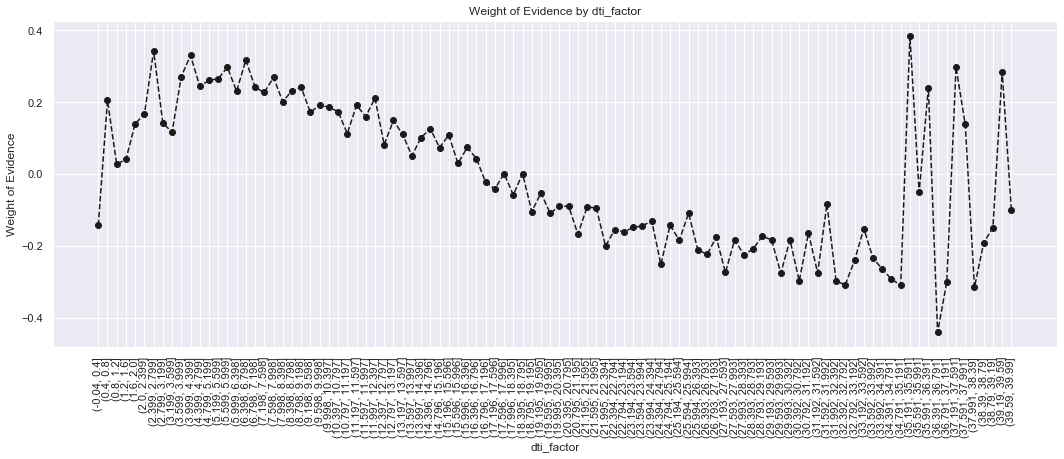

In [142]:
plot_by_woe(df_temp, 90)

In [143]:
df_inputs_prepr_temp = train_inputs_prepr.loc[train_inputs_prepr['dti'] <= 35, : ]

In [144]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', train_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",1341,0.888889,0.003623,1192.0,149.0,0.003614,0.003691,-0.021030,NaN,NaN,0.027004
1,"(0.7, 1.4]",1645,0.893617,0.004444,1470.0,175.0,0.004457,0.004335,0.027760,0.004728,0.048790,0.027004
2,"(1.4, 2.1]",2000,0.909500,0.005403,1819.0,181.0,0.005516,0.004484,0.207074,0.015883,0.179313,0.027004
3,"(2.1, 2.8]",2516,0.911367,0.006797,2293.0,223.0,0.006953,0.005524,0.229973,0.001867,0.022899,0.027004
4,"(2.8, 3.5]",3142,0.904519,0.008488,2842.0,300.0,0.008618,0.007432,0.148010,0.006848,0.081964,0.027004
5,"(3.5, 4.2]",3848,0.914501,0.010396,3519.0,329.0,0.010670,0.008150,0.269403,0.009982,0.121394,0.027004
6,"(4.2, 4.9]",4577,0.912607,0.012365,4177.0,400.0,0.012666,0.009909,0.245413,0.001895,0.023990,0.027004
7,"(4.9, 5.6]",5369,0.914695,0.014505,4911.0,458.0,0.014891,0.011346,0.271892,0.002089,0.026480,0.027004
8,"(5.6, 6.3]",5911,0.914904,0.015969,5408.0,503.0,0.016398,0.012461,0.274573,0.000209,0.002681,0.027004
9,"(6.3, 7.0]",6538,0.915265,0.017663,5984.0,554.0,0.018145,0.013724,0.279209,0.000360,0.004635,0.027004


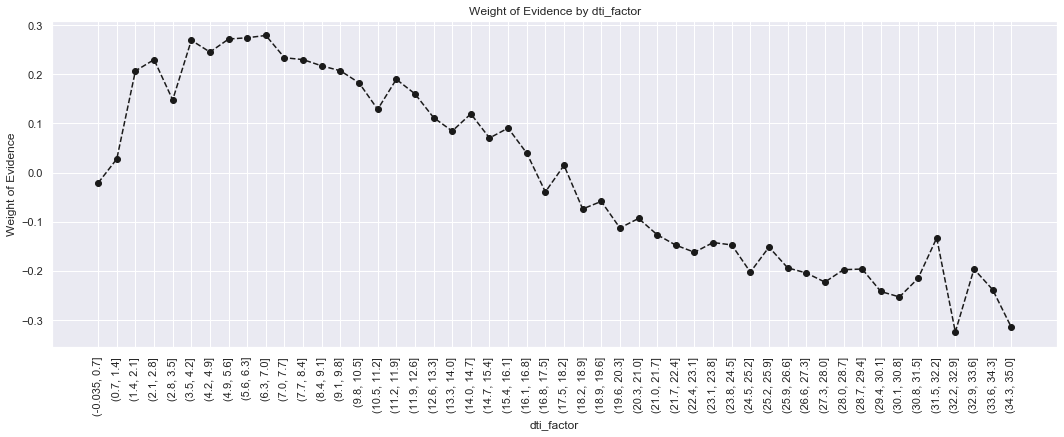

In [145]:
plot_by_woe(df_temp, 90)

In [146]:
# Categories:
train_inputs_prepr['dti:<=1.4'] = np.where((train_inputs_prepr['dti'] <= 1.4), 1, 0)
train_inputs_prepr['dti:1.4-3.5'] = np.where((train_inputs_prepr['dti'] > 1.4) & (train_inputs_prepr['dti'] <= 3.5), 1, 0)
train_inputs_prepr['dti:3.5-7.7'] = np.where((train_inputs_prepr['dti'] > 3.5) & (train_inputs_prepr['dti'] <= 7.7), 1, 0)
train_inputs_prepr['dti:7.7-10.5'] = np.where((train_inputs_prepr['dti'] > 7.7) & (train_inputs_prepr['dti'] <= 10.5), 1, 0)
train_inputs_prepr['dti:10.5-16.1'] = np.where((train_inputs_prepr['dti'] > 10.5) & (train_inputs_prepr['dti'] <= 16.1), 1, 0)
train_inputs_prepr['dti:16.1-20.3'] = np.where((train_inputs_prepr['dti'] > 16.1) & (train_inputs_prepr['dti'] <= 20.3), 1, 0)
train_inputs_prepr['dti:20.3-21.7'] = np.where((train_inputs_prepr['dti'] > 20.3) & (train_inputs_prepr['dti'] <= 21.7), 1, 0)
train_inputs_prepr['dti:21.7-22.4'] = np.where((train_inputs_prepr['dti'] > 21.7) & (train_inputs_prepr['dti'] <= 22.4), 1, 0)
train_inputs_prepr['dti:22.4-35'] = np.where((train_inputs_prepr['dti'] > 22.4) & (train_inputs_prepr['dti'] <= 35), 1, 0)
train_inputs_prepr['dti:>35'] = np.where((train_inputs_prepr['dti'] > 35), 1, 0)

In [148]:
# mths_since_last_record
df_inputs_prepr_temp = train_inputs_prepr[pd.notnull(train_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', train_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",1061,0.767201,0.021160,814.0,247.0,0.018146,0.046763,-0.946647,NaN,NaN,inf
1,"(2.58, 5.16]",123,0.878049,0.002453,108.0,15.0,0.002408,0.002840,-0.165138,0.110848,0.781509,inf
2,"(5.16, 7.74]",133,0.917293,0.002653,122.0,11.0,0.002720,0.002083,0.266906,0.039244,0.432045,inf
3,"(7.74, 10.32]",251,0.912351,0.005006,229.0,22.0,0.005105,0.004165,0.203460,0.004943,0.063446,inf
4,"(10.32, 12.9]",210,0.909524,0.004188,191.0,19.0,0.004258,0.003597,0.168615,0.002827,0.034845,inf
5,"(12.9, 15.48]",314,0.898089,0.006262,282.0,32.0,0.006286,0.006058,0.036952,0.011435,0.131663,inf
6,"(15.48, 18.06]",331,0.924471,0.006601,306.0,25.0,0.006821,0.004733,0.365490,0.026382,0.328538,inf
7,"(18.06, 20.64]",247,0.931174,0.004926,230.0,17.0,0.005127,0.003218,0.465647,0.006703,0.100157,inf
8,"(20.64, 23.22]",442,0.907240,0.008815,401.0,41.0,0.008939,0.007762,0.141170,0.023934,0.324477,inf
9,"(23.22, 25.8]",331,0.909366,0.006601,301.0,30.0,0.006710,0.005680,0.166693,0.002126,0.025524,inf


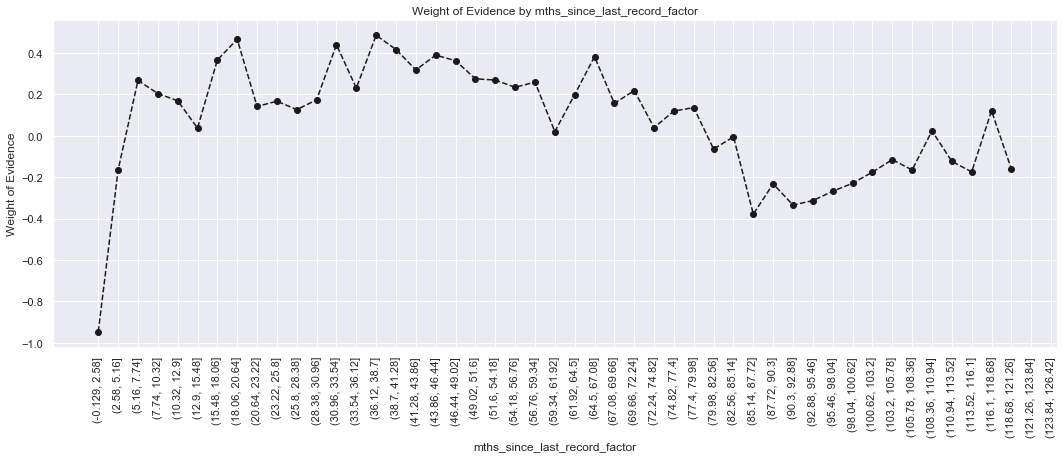

In [149]:
plot_by_woe(df_temp, 90)

In [150]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
train_inputs_prepr['mths_since_last_record:Missing'] = np.where((train_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
train_inputs_prepr['mths_since_last_record:0-2'] = np.where((train_inputs_prepr['mths_since_last_record'] >= 0) & (train_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
train_inputs_prepr['mths_since_last_record:3-20'] = np.where((train_inputs_prepr['mths_since_last_record'] >= 3) & (train_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
train_inputs_prepr['mths_since_last_record:21-31'] = np.where((train_inputs_prepr['mths_since_last_record'] >= 21) & (train_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
train_inputs_prepr['mths_since_last_record:32-80'] = np.where((train_inputs_prepr['mths_since_last_record'] >= 32) & (train_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
train_inputs_prepr['mths_since_last_record:81-86'] = np.where((train_inputs_prepr['mths_since_last_record'] >= 81) & (train_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
train_inputs_prepr['mths_since_last_record:>86'] = np.where((train_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

In [151]:
loan_data_inputs_test = train_inputs_prepr

In [153]:
#loan_data_inputs_test.to_csv('../test_loandata_input.csv')
#loan_data_targets_test.to_csv('../test_loandata_target.csv')